# Praca domowa 5

## Wstęp

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

Wczytujemy zbiór danych `clustering.csv` oznaczając kolumy jako `x` oraz `y`.

In [2]:
dt = pd.read_csv("../clustering.csv", names = ['x', 'y'])

Spójrzmy teraz na kilka pierwszych wierszy załadowanego zbioru, a następnie zwizualizujmy go.

In [3]:
dt.head()

,x,y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


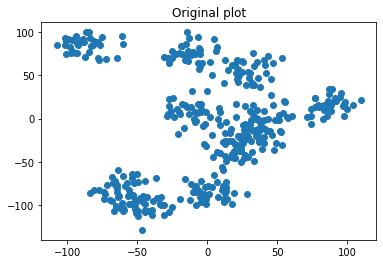

In [4]:
plt.scatter(x = dt['x'], y = dt['y'])
plt.title("Original plot")
plt.show()

Jak widać rozważany zbiór danych zawiera się w przestrzeni $[-130; 130]\times[-130; 130]$. Ponadto można go podzielić na kilka grup na podstawie zajmowanego miejsca na płaszczyźnie, jednakże wykonanie takiego podziału ręcznie byłoby trudnym zajęciem. Dlatego przejdźmy teraz do algortmów klasteryzacji, które takim podziałem się zajmują.

## Algorytm k-means

Ważnym fragmentem algorytmu klasteryzacji jest wybór odpowiedniej liczby klastrów. W przypadku algorytmu k-means wykorzystamy metodę łokciową (`elbow method`).

In [5]:
def elbow_method(df, k_max):
    """
    function that prepares plot showing distortions for each number of clusters from 1 up to k_max
    """
    distortions = []
    for k in range(1, k_max):
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(df)
        distortions.append(kmeanModel.inertia_)
    plt.figure(figsize = (10,5))
    plt.plot(range(1, k_max), distortions, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    return plt

Teraz wykorzystajmy przygotowaną funkcję do znalezienia optymalnej liczby klastrów dla algorytmu k-means.

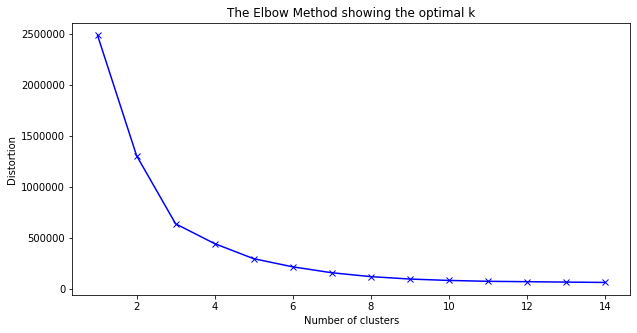

In [6]:
elbow_method(dt, 15).show()

Metoda łokciowa jest dość subiektywna, ponieważ poszukujemy miejsca, gdzie krzywa ulega wypłaszczeniu. Moim zdaniem odpowiednia liczba klastrów, która pasuje do tej definicji to 8, chociaż, jak wspomniałem, jest to subiektywna ocena.

In [7]:
def plot_kmeans_clusters(df, n_clusters):
    """
    function that prepares plot with the original points but this time colored according to the cluster to which they belong
    assignment to clusters is done using k-means method
    """
    df = np.array(df)
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df)
    y_kmeans = kmeans.predict(df)
    plt.scatter(df[:, 0], df[:, 1], c=y_kmeans, s=30, cmap='rainbow_r')
    plt.title('K-means clusters')
    return plt

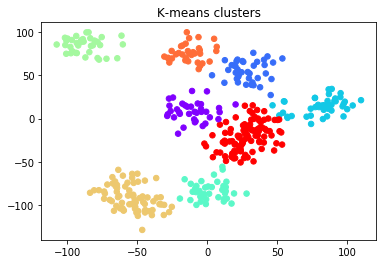

In [8]:
plot_kmeans_clusters(dt, 8).show()

Podsumowując, algorytm k-średnich (`k-means algorithm`), zgodnie z oczekiwaniami, podzielił analizowany zbiór na 8 podgrup w dość logiczny sposób.

# Algorytm hierarchiczny (aglomeracyjny)

Jeszcze raz testowanie algorytmu rozpoczniemy od określenia odpowiedniej liczby klastrów. Tym razem skorzystamy z metody silhouette.

In [9]:
def silhouette_method_for_AgglomerativeClustering(df, k_max):
    """
    functions prepares plot showing silhouette score for each number of clusters from 1 up to k_max
    """
    scores = []    
    for k in range(2, k_max):
        model_instance = AgglomerativeClustering(n_clusters=k)
        labels = model_instance.fit_predict(df)
        wcss = silhouette_score(df, labels)
        scores.append(wcss)
    plt.plot(range(2, k_max), scores, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.title("The Silhouette Method showing the optimal k")
    return plt

Po przygotowaniu funkcji sprawdźmy jaka liczba klastrów jest sugerowana w tym przypadku.

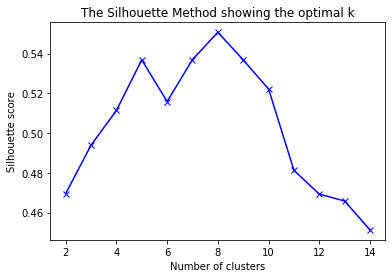

In [10]:
silhouette_method_for_AgglomerativeClustering(dt, 15).show()

Wiedząc, że w przypadku tej metryki większa wartość sugeruje optymalniejszą liczbę klastrów, dość łatwo zauważyć, że ponownie najlepszym wyborem będzie 8 grup podziału.

In [11]:
def plot_agglomerative_clusters(df, n_clusters):
    """
    function that prepares plot with the original points but this time colored according to the cluster to which they belong
    assignment to clusters is done using agglomerative clustering
    """
    df = np.array(df)
    model = AgglomerativeClustering(n_clusters=8)
    y = model.fit_predict(df)
    plt.scatter(df[:, 0], df[:, 1], c=y, s=30, cmap='rainbow_r')
    plt.title('Agglomerative clusters')
    return plt

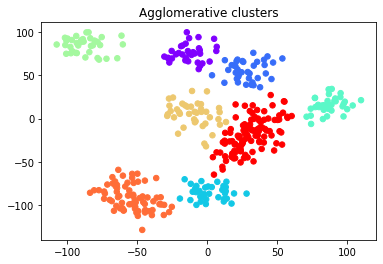

In [12]:
plot_agglomerative_clusters(dt, 8).show()

Algorytm hierarchiczny aglomeracyjny również w dość czytelny sposób podzielił rozważany zbiór na 8 podgrup. Mimo podobnego efektu jak w przypadku algorytmu k-średnich da się zaobserwować pewne różnice w otrzymanych wynikach. Chodzi konkretnie o klaster umieszczony centralnie, w kolorze czerwonym, który na powyższym rysunku jest nieznacznie większy niż w przypadku poprzedniej metody.